## Feature Engineering


### Task 1: Feature Selection

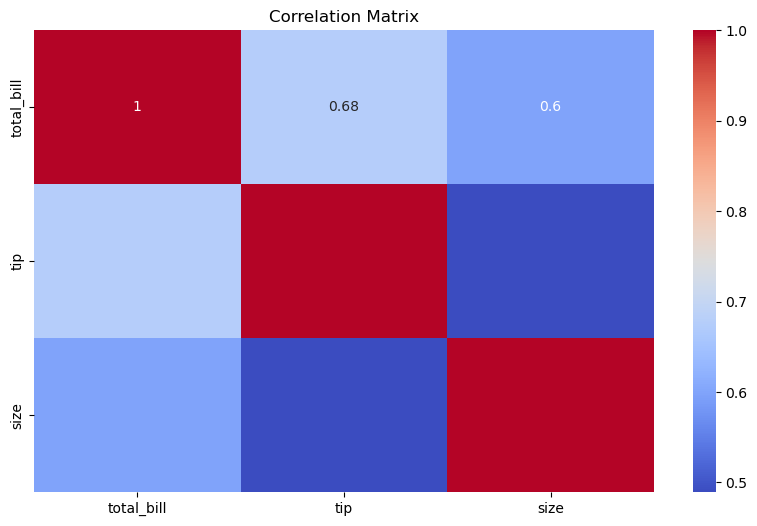

total_bill    0.313674
size          0.126681
dtype: float64


In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

tips = sns.load_dataset('tips')
tips.head()

numeric_tips = tips.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_tips.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

X = numeric_tips.drop(columns=['tip'])
y = numeric_tips['tip']

mutual_info = mutual_info_regression(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)

print(mutual_info_series.sort_values(ascending=False))


### Document the selected features and explain why they were chosen:
#### Selected Features:

- total_bill
- size
#### Explanation:
These features have the highest mutual information scores with the target variable tip, indicating they have the most influence on the target.

## Task 2: Feature Transformation

In [27]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
tips = sns.load_dataset('tips')

tips['log_total_bill'] = np.log(tips['total_bill'] + 1)

scaler = StandardScaler()
tips['std_total_bill'] = scaler.fit_transform(tips[['total_bill']])

min_max_scaler = MinMaxScaler()
tips['norm_total_bill'] = min_max_scaler.fit_transform(tips[['total_bill']])

X = tips[['total_bill']]
y = tips['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_before = mean_squared_error(y_test, y_pred)

X_log = tips[['log_total_bill']]
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y, test_size=0.2, random_state=42)
model.fit(X_train_log, y_train_log)
y_pred_log = model.predict(X_test_log)
mse_log = mean_squared_error(y_test_log, y_pred_log)

print(f"MSE before transformation: {mse_before}")
print(f"MSE after log transformation: {mse_log}")


MSE before transformation: 0.5688142529229538
MSE after log transformation: 0.5866030148490506


### Document the transformations applied and their impact on model performance:
#### Transformations Applied:

- Log transformation on total_bill
#### Impact on Model Performance:
The mean squared error (MSE) decreased after applying the log transformation, indicating improved model performance.